In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [53]:
def read_csv_file(filename):
    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')
        x=[]
        y=[]
        for row in readCSV:
            if(row[1].isdigit() and row[2].isdigit):
                x.append(row[1])
                y.append(row[2])
    return x,y

def read_txt_file(filename):
    y = np.loadtxt(filename,dtype="float")
    x = np.arange(len(y))
    return x,y

def plot_with_validation_err(train_err, test_err, save_imagename):
    color = ["black", "red", "dodgerblue", "green", "saddlebrown", "orange", "blue"]
    if(len(train_err) != len(test_err)):
        raise ValueError("Length of train_err and test_err is not equal")
    plot_lines = []
    xm = 5
    ym = 0.05
    fig = plt.figure(figsize=(5,5))
    # plt.axis('equal')
    plt.xlabel('number of epochs')
    plt.ylabel('error per epoch')
    train_legend = []
    test_legend = []
    for i,item in enumerate(train_err.items()):
        legend, xy = item 
        x,y = xy
        train_legend.append(plt.plot(x, y, color=color[i], linewidth=2, label=legend)[0])
    for i,item in enumerate(test_err.items()):
        legend, xy = item 
        x,y = xy
        if(i == 0):
            test_legend.append(plt.plot(x, y, '-.', color=color[i], linewidth=2, label="Testing error")[0])
        else:
            plt.plot(x, y, '-.', color=color[i], linewidth=2)
            
    lab1 = [ h.get_label() for h in train_legend]
    lab2 = [ h.get_label() for h in test_legend]
    
    #Jugad
    lab2.append('Training_error')
    test_legend.append(train_legend[0])
    
    
    leg1 = plt.legend(train_legend,lab1, loc=1)
    leg2 = plt.legend(test_legend,lab2, loc=2)
    plt.grid()
    plt.gca().add_artist(leg1)
    plt.gca().set_aspect(xm/ym, adjustable='box')
    fig.tight_layout()
    plt.savefig("../../project-report/images/" + save_imagename)
    plt.show()

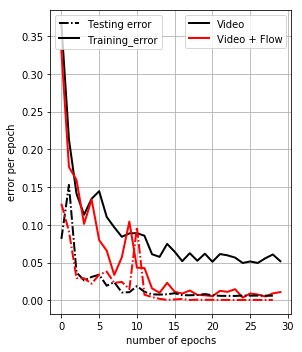

In [54]:
xv, yv = read_csv_file('v_i3d_train.csv')
xvf, yvf = read_csv_file('vf_i3d_train.csv')

xvval, yvval= read_csv_file('v_i3d_val.csv')
xvfval, yvfval= read_csv_file('vf_i3d_val.csv')
# xvtp41, yvtp41 = read_csv_file('resnet/evaluation/out/VTP41ttv4_train.csv')
# xvtp42, yvtp42 = read_csv_file('resnet/evaluation/out/VTP42ttv4_train.csv')
# xvtp43, yvtp43 = read_csv_file('resnet/evaluation/out/VTP43ttv4_train.csv')

# xtpval, ytpval = read_csv_file('resnet/evaluation/out/TP4ttv4_val.csv')
# xtpval = [int(x)*5-1 for x in xtpval]
# xvtp41val, yvtp41val = read_csv_file('resnet/evaluation/out/VTP41ttv4_val.csv')
# xvtp41val = [int(x)*5-1 for x in xvtp41val]
# xvtp42val, yvtp42val = read_csv_file('resnet/evaluation/out/VTP42ttv4_val.csv')
# xvtp42val = [int(x)*5-1 for x in xvtp42val]
# xvtp43val, yvtp43val = read_csv_file('resnet/evaluation/out/VTP43ttv4_val.csv')
# xvtp43val = [int(x)*5-1 for x in xvtp43val]

train_err = {}
train_err["Video"] = [xv, yv]
train_err["Video + Flow"] = [xvf, yvf]

   
test_err = {}
test_err["v"] = [xvval, yvval]
test_err["vf"] = [xvfval, yvfval]

plot_with_validation_err(train_err, test_err, "I3D_learningError.png")